In [2]:
from RRI import *
import matplotlib.pyplot as plt
import h5py
from datetime import datetime
import pandas as pd
import numpy as np
import math as mt
from math import sqrt
from scipy.signal import find_peaks
%matplotlib inline

In [3]:
fn_=RRI("RRI_20150401_033844_034241_lv1_12.0.0.h5")

In [4]:
time=fn_.epop_met 
am1_=fn_.m1_mV
m1_=fn_.m1_mV
m2_=fn_.m2_mV
m3_=fn_.m3_mV
m4_=fn_.m4_mV
time=fn_.epop_met
geo_lat=fn_.glat_
geo_lon=fn_.glon_
alt=fn_.alt_
freq_1=fn_.d1_freq
fs=fn_.fs_

In [5]:
from scipy.interpolate import interp1d

x=np.linspace(0,237,num=238,endpoint=True)
y=fn_.epop_met
y1=fn_.glat_
y2=fn_.glon_
y3=fn_.alt_
#f=interp1d(x,y)
f2=interp1d(x,y,kind='linear')
f3=interp1d(x,y1,kind='linear')
f4=interp1d(x,y2,kind='linear')
f5=interp1d(x,y3,kind='linear')
xnew=np.linspace(0,237,num=14810126,endpoint=True)

In [6]:
time=f2(xnew)
geo_lat=f3(xnew)
geo_lon=f4(xnew)
alt=f5(xnew)

In [7]:
time2=[]
for i in range(len(time)):
    dt_obj1 = pd.to_datetime(time[i], unit='s',origin='1968-05-24')
    time2.append(dt_obj1)
df2 = pd.DataFrame (time2, columns = ['time'])
time_1=pd.to_datetime(df2['time'],format='%Y-%m-%d %H:%M:%S.%f')

In [520]:
loc_nan=np.isnan(m1_)
m1_[loc_nan]=0

loc_nan=np.isnan(m2_)
m2_[loc_nan]=0

loc_nan=np.isnan(m3_)
m3_[loc_nan]=0

loc_nan=np.isnan(m4_)
m4_[loc_nan]=0

In [521]:
diapole_1=m1_+1j*m2_
diapole_2=m3_+1j*m4_

v1=abs(diapole_1) #amplitude of diapole 1
v2=abs(diapole_2)  #amplitude of diapole 2

In [1]:

def generate_sinc_pulse(frequency, duration, sampling_rate):
    t = np.linspace(0, duration, int(duration * sampling_rate), endpoint=False)
    pulse = np.sinc(frequency * (t - duration / 2))
    return t, pulse

# Parameters for the sinc pulse
pulse_frequency = 5  # Adjust this value to change the frequency of the sinc pulse
pulse_duration = 1.0  # Adjust this value to change the duration of the sinc pulse
sampling_rate = 1000  # Adjust this value to change the sampling rate

# Generate the sinc pulse
t, pulse = generate_sinc_pulse(pulse_frequency, pulse_duration, sampling_rate)

# Repeating the pulse
num_repeats = 5
repeated_pulse = np.tile(pulse, num_repeats)

# Plotting the repeated sinc pulse
plt.figure(figsize=(10, 4))
plt.plot(t, repeated_pulse)
plt.title('Repeated Sinc Pulse')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

NameError: name 'np' is not defined

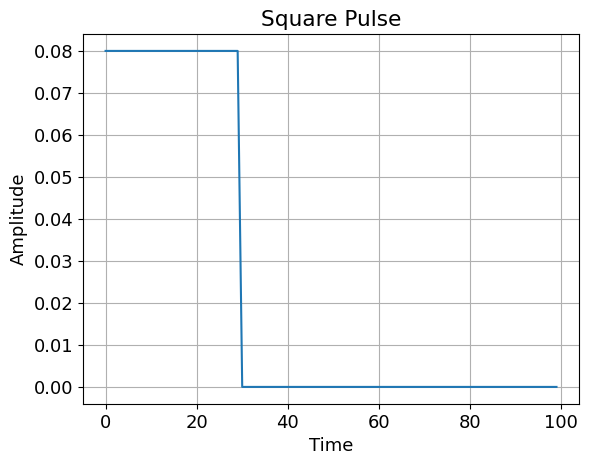

In [532]:
import numpy as np
import matplotlib.pyplot as plt

def generate_square_pulse(width, amplitude, total_length):
    pulse = np.zeros(total_length)
    for i in range(width):
        pulse[i] = amplitude
    return pulse

width = 30
amplitude = 0.08
total_length = 100

pulse = generate_square_pulse(width, amplitude, total_length)

plt.plot(pulse)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Square Pulse')
plt.grid(True)
plt.show()

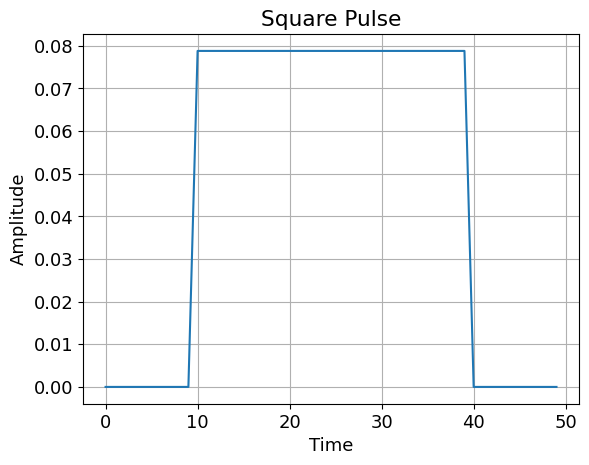

In [531]:


def generate_square_pulse(width, height, total_length):
    pulse = np.zeros(total_length)
    pulse[10:width] = height
    return pulse

width = 40
height = height=np.nanquantile(np.abs(v1),0.5)
total_length = 50

pulse = generate_square_pulse(width, height, total_length)

plt.plot(pulse)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Square Pulse')
plt.grid(True)
#plt.ylim(0, 0.1)
plt.show()
#This code will generate a square pulse with a width of 15 units, a height of 0.08, and a total length of 30 units. The function generate_square_pulse creates the square pulse as a NumPy array, and the code then uses matplotlib to plot the pulse. The y-axis is limited to 0 to 0.1 to better visualize the pulse height. You can adjust the width, height, and total_length variables as needed.






In [533]:
def divide_chunks(l, n):
          for i in range(0, len(l), n): 
                    yield l[i:i + n]

In [534]:
sig_n=list(divide_chunks(v1,300))


In [535]:
len(sig_n)

49368

In [525]:
import numpy as np
from scipy.signal import correlate

# Generate a signal with a pulse at time t=50
cof=[]

for i in range(len(sig_n)):
          signal = sig_n[i]
          pulse = pulse
          corr = correlate(signal, pulse, mode='same')
          cof.append(corr)
          

         
          

In [526]:
pulse_loc1=[]
pulse_loc2=[]

for i in range(len(sig_n)):
          if max(cof[i])>0.15:
                    max_indices1 = np.argsort(cof[i])[-2:]
                    max_indices2= np.argsort(cof[i])[-1:]
                    ind=abs(np.diff(max_indices1))
                    if ind[0]>30:
                              for j in range(2):
                                        pulse_loc1.append(max_indices1[j]+i*300)
                                        j+=1
                    else:
                              pulse_loc2.append(max_indices2[0]+i*300)
                              
          else:
                    i+=1         
          
          


pulse_loc = sorted(pulse_loc1+pulse_loc2)        





In [527]:
pulse_loc

[554,
 748,
 1025,
 1397,
 2523,
 3499,
 8916,
 31308,
 32619,
 33371,
 33840,
 34215,
 35247,
 37934,
 39247,
 39995,
 40463,
 40839,
 41870,
 44369,
 45500,
 45682,
 46432,
 46619,
 46902,
 47277,
 48285,
 48402,
 50809,
 52121,
 52871,
 53339,
 53715,
 54747,
 57245,
 58558,
 59308,
 59496,
 59776,
 60150,
 61183,
 61277,
 63683,
 64997,
 65747,
 66214,
 66585,
 66615,
 67622,
 77977,
 78448,
 81088,
 91144,
 93285,
 93315,
 94620,
 95370,
 95558,
 95840,
 96214,
 97181,
 97246,
 99447,
 99745,
 101058,
 101808,
 102277,
 102653,
 103778,
 103895,
 104370,
 106183,
 107495,
 108245,
 108433,
 108714,
 109089,
 110213,
 112620,
 113935,
 114869,
 115153,
 115527,
 116653,
 117194,
 117359,
 119058,
 119228,
 120371,
 121123,
 121307,
 121590,
 121965,
 122985,
 123091,
 125494,
 126031,
 126808,
 127746,
 128027,
 128385,
 128415,
 129434,
 133378,
 135395,
 140484,
 141505,
 146602,
 150998,
 153368,
 155189,
 156494,
 157250,
 157720,
 158085,
 158445,
 159122,
 161625,
 162934,
 1

In [528]:
len(pulse_loc)

48680

In [335]:
x=np.array(pulse_loc)
len(x)

46248

In [336]:
from scipy.signal import find_peaks

In [513]:
pulse1=[]

for i in range(len(x)):
                 df_v1=pd.DataFrame(v1)
                 v_1=(df_v1.iloc[x[i]-30:x[i]+30]).reset_index(drop=True)
                 pulse1.append(v_1)
             

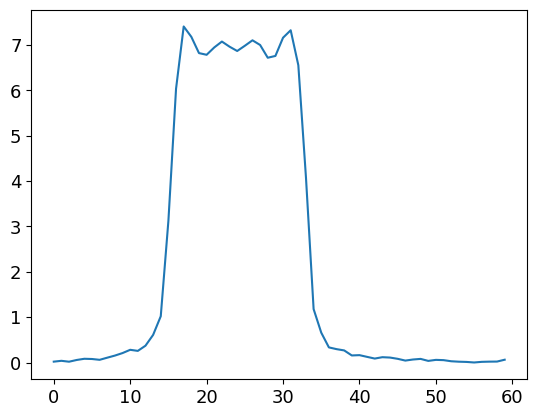

In [514]:
plt.plot(pulse1[720])

In [338]:
def from_3d_numpy_to_2d_array(X):
    array_2d = X.reshape(X.shape[0], -1)
    return array_2d

In [339]:
g=np.array(pulse1)
n1=from_3d_numpy_to_2d_array(g)
print(n1.shape)

(46248, 60)


In [340]:
noise_data=[]
for i in range(len(x)):
          v1_noise=(df_v1.iloc[x[i]+25:x[i]+45]).reset_index(drop=True)
          noise_data.append(v1_noise)

In [341]:
noise=np.array(noise_data)
n2=from_3d_numpy_to_2d_array(noise)

In [342]:
#converting 3D array into 2D array

g=np.array(pulse1)
n1=from_3d_numpy_to_2d_array(g)
print(n1.shape)

(46248, 60)


In [343]:
#finding runnig sum of data and find the position of maximum sum of set of data
ls=[]
list_new=[]
for k in range(len(n1)):
                 sub_n1=n1[k]
                 for i in range(51):
                                  j=0
                                  sublist=sub_n1[i+j:i+j+10]
                                  
                                  #sublist1=np.array(sublist1)
                                  list_new.append(sublist)

In [344]:
#splititng dataset and finding maximum sum of set of data
list_new=np.array(list_new)
arr2 = np.split(list_new, len(n1), axis=0)
extract=[]
for m in range(len(n1)):
                 nj=arr2[m]
                 sum1=np.sum(nj,axis=1)
                 sum1=np.array(sum1)
                 n0=sum1.argmax()
                 sublist3=nj[n0]
                 extract.append(sublist3)

In [345]:
newextract=[]
for h in range(len(n1)):
                 m=(extract[h]).tolist()
                 newextract.append(m)

In [346]:
pos=[]
for z in range(len(n1)):
                 indices = [i for i, x in enumerate(n1[z]) for p , y in enumerate(extract[z]) if x==y]
                 pos.append(indices)

In [348]:
for u in range(len(n1)):
                 for i in range(len(pos[u])-3):
                                  if (pos[u][i + 1] - pos[u][i])>1:
                                                   del pos[u][i]

In [349]:
#creating nan list 

a = np.empty((len(n1),60))
a[:] = np.nan
a.tolist()
newa=[]
for k in range(len(n1)):
                 no=(a[k]).tolist()
                 newa.append(no)

In [350]:
for i in range(len(n1)):
                 for k in range(10):
                                  posi=[val for w, val in enumerate(pos[i])]
                                  dat=[value for q,value in enumerate(newextract[i])]
                                  #newa[i].insert(posi[k],dat[k])
                                  newa[i][posi[k]]=dat[k]

In [351]:
extract2=np.array(extract)
extract1=extract2**2

In [352]:
s4_new_let=[]
for i in range(len(extract1)):
    s4=sqrt((np.nanmean((extract1[i])**2)-(np.nanmean(extract1[i]))**2)/(np.nanmean(extract1[i]))**2)
    s4_new_let.append(s4)

In [353]:
time_pulse1=[]
for i in range(len(x)):
                 timeframe=pd.DataFrame(time,index=None)
                 t_1=(timeframe.iloc[x[i]-30:x[i]+30]).reset_index(drop=True)
                 time_pulse1.append(t_1)

In [354]:
time_pulse1=np.array(time_pulse1)

In [355]:
#time in micrsecond

time_micro=time_pulse1/10**(-6)
real_time=[]
for i in range(len(n1)):
                 real_time1=time_micro[i]-time_micro[i][0]
                 real_time.append(real_time1)

In [356]:
time_extract=[]
for i in range(len(n1)):
                 c=time_pulse1[i][pos[i]]
                 time_extract.append(c)

In [357]:
middle_index=[]
for u in range(len(n1)):
                 nu=time_extract[u][int(len(time_extract[u])/2)]
                 middle_index.append(nu)

In [358]:
middle_index=pd.DataFrame(middle_index)

In [359]:
time_for_s4_new=[]
for i in range(len(middle_index[0])):
    dt_obj1 = pd.to_datetime(middle_index[0][i], unit='s',origin='1968-05-24')
    time_for_s4_new.append(dt_obj1)
df2 = pd.DataFrame (time_for_s4_new, columns = ['time'])
time_real=pd.to_datetime(df2['time'],format='%Y-%m-%d %H:%M:%S.%f')

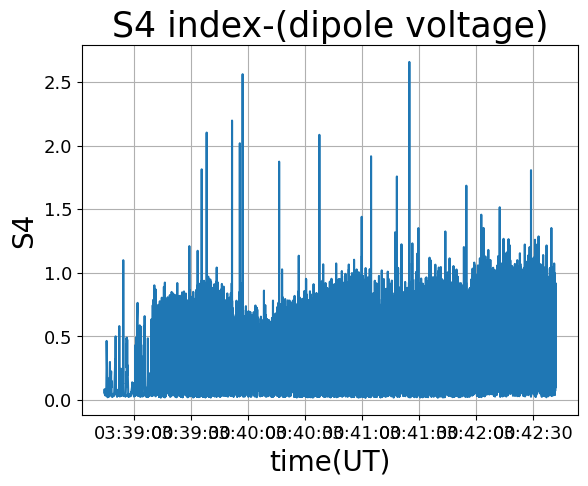

In [360]:
plt.plot(time_1[x],s4_new_let)
#plt.plot(time_1[x][0:10000],s4_new_let[0:10000])
#plt.xlim(left=pd.Timestamp('2015-04-01 03:40:00'),right=pd.Timestamp('2015-04-01 03:40:30') )
#plt.ylim(0,1.2)
plt.title('S4 index-(dipole voltage)',fontsize=25)
plt.grid(True)
#plt.xlim(4000,4200)
plt.xlabel('time(UT)',fontsize=20)
plt.ylabel('S4',fontsize=20)
plt.rcParams.update({'font.size': 13})

In [197]:
extract1[12]

array([20.67235215, 20.68007016, 19.47000226, 18.42256136, 19.16559777,
       20.41266118, 19.61065277, 18.52243465, 18.21697284, 18.81739965])

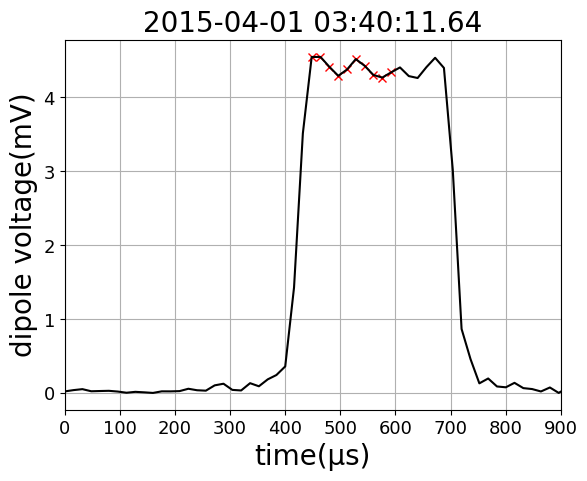

In [198]:
plt.plot(real_time[12],newa[12],'x',color='r')
plt.plot(real_time[12],n1[12],color='black')
plt.xlabel('time(μs)',fontsize=20)
plt.ylabel('dipole voltage(mV)',fontsize=20)
plt.title("2015-04-01 03:40:11.64",fontsize=20)
plt.rcParams.update({'font.size': 13})
plt.xlim(0,900)
#plt.ylim(0,1)
plt.grid(True)

In [58]:
len(n1)

10796

In [43]:
for i in range(len(n1)):
    fig, ax = plt.subplots()
    ax.plot(real_time[i],newa[i],'x',color='r')
    ax.plot(real_time[i],n1[i],color='black')
    ax.set_xlim(0,900)
    ax.set_title(f'{time_1[x[i]]}')
    fig.savefig(f'/volumes/subodh/newpulses/{time_1[x[i]]}.png')
    plt.close()

In [47]:
#calculating SNR
def signal_power(signal_data):
    return np.sum(signal_data ** 2) / len(signal_data)
    
def noise_power(noise_data):
    noise = noise_data
    return np.sum(noise ** 2) / len(noise)

In [48]:
#finding signal to noise ration(SNR)
SNR=[]
pos_signal_less_then_10=[]
pos_signal_greater_then_10=[]
for i in range(len(n1)):
          x1=(signal_power(extract2[i])-noise_power(n2[i])) / noise_power(n2[i]) #extract2 is datapoint from top of pulse and n2 is
          snr = 10*np.log10(x1)
          if snr<00:
                    pos_signal_less_then_10.append(i)
          if snr>=00:
                    SNR.append(snr)
                    pos_signal_greater_then_10.append(i)
SNR=np.array(SNR)
s_nan=np.isnan(SNR)
SNR[s_nan]=0
df_SNR=pd.DataFrame(SNR)
df_SNR.interpolate()
pos_signal_less_then_10=np.array(pos_signal_less_then_10)
pos_signal_greater_then_10=np.array(pos_signal_greater_then_10)

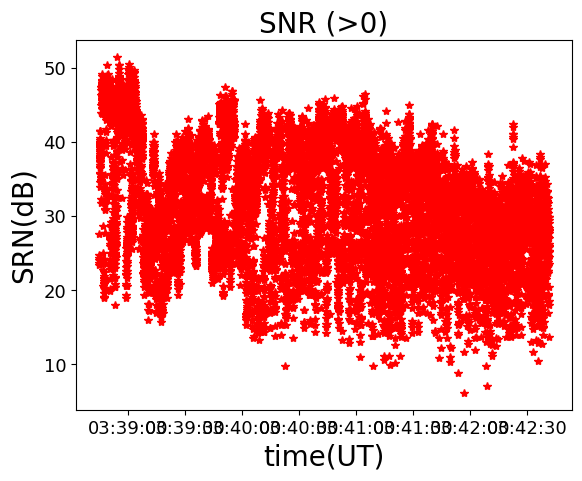

In [49]:
plt.plot(time_1[x[pos_signal_greater_then_10]],df_SNR,'r*')
#plt.plot(time_1[x][0:10186],df_SNR[0:10186])
#plt.xlim(left=pd.Timestamp('2015-04-01 03:38:20'),right=pd.Timestamp('2015-04-01 03:39:40'))
plt.title("SNR (>0)",fontsize=20)
#plt.xlim(200,400)
plt.ylabel("SRN(dB)",fontsize=20)
plt.xlabel("time(UT)",fontsize=20)
plt.rcParams.update({'font.size': 11})